In [116]:
import pandas as pd
import numpy as np


In [117]:
df = pd.read_csv(r'./Bike.csv')

Get the first five rows of dataframe

In [118]:
df.head()

,Brand,Model,Selling_Price,Year,Owner,KM_Driven
0,TVS,TVS XL 100,30000,2017,1st owner,8000
1,Bajaj,Bajaj ct 100,18000,2017,1st owner,35000
2,Yo,Yo Style,20000,2011,1st owner,10000
3,Bajaj,Bajaj Discover 100,25000,2010,1st owner,43000
4,Bajaj,Bajaj Discover 100,24999,2012,2nd owner,35000


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          1061 non-null   object
 1   Model          1061 non-null   object
 2   Selling_Price  1061 non-null   int64 
 3   Year           1061 non-null   int64 
 4   Owner          1061 non-null   object
 5   KM_Driven      1061 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 49.9+ KB


Get Summary of Statics 

In [120]:
df.describe()

,Selling_Price,Year,KM_Driven
count,1061.000000,1061.000000,1061.000000
mean,59638.151744,2013.867107,34359.833176
std,56304.291973,4.301191,51623.152702
min,5000.000000,1988.000000,350.000000
25%,28000.000000,2011.000000,13500.000000
50%,45000.000000,2015.000000,25000.000000
75%,70000.000000,2017.000000,43000.000000
max,760000.000000,2020.000000,880000.000000


Get Catagories and Cout of Categorical Varibles 

In [121]:
df[['Brand']].value_counts()

Brand   
Bajaj       260
Hero        232
Honda       204
Royal       109
Yamaha      102
TVS          69
Suzuki       30
KTM          24
Mahindra      6
Vespa         4
Kawasaki      4
UM            3
Activa        3
Jawa          3
Aprilia       2
Harley        2
Hyosung       1
Benelli       1
BMW           1
Yo            1
dtype: int64

In [122]:
df[['Model']].value_counts()

Model                    
Bajaj Pulsar 150             41
Royal Enfield Classic 350    27
Honda Activa [2000-2015]     23
Honda CB Hornet 160R         22
Bajaj Pulsar 180             20
                             ..
Hero Honda CD100SS            1
Hero Honda Karizma            1
Royal Enfield Machismo        1
Hero Honda Passion            1
Yo Style                      1
Length: 279, dtype: int64

In [123]:
#df[['Seller_Type']].value_counts()

In [124]:
df[['Owner']].value_counts()

Owner    
1st owner    924
2nd owner    123
3rd owner     14
dtype: int64

Get column names 

In [125]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Owner', 'KM_Driven'], dtype='object')

Get Shape of Dataframes 

In [126]:
df.shape

(1061, 6)

Get incoding of Categorical Features

In [127]:
#df.replace({'Seller':{'indidual':0, 'Dealer':1}},inplace=True)

In [128]:
df.replace({'Owner':{'1st owner':0, '2nd owner':1, '3rd owner':2,}},inplace=True)

Define y(depenent or label or target variable ) and X (Independent or features or attribute varible)

In [129]:
y = df['Selling_Price']

In [130]:
y.shape

(1061,)

In [131]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
1056    90000
1057    20000
1058    60000
1059    40000
1060    35000
Name: Selling_Price, Length: 1061, dtype: int64

In [132]:
X = df[['Year','Owner','KM_Driven',]]

In [133]:
X

,Year,Owner,KM_Driven
0,2017,0,8000
1,2017,0,35000
2,2011,0,10000
3,2010,0,43000
4,2012,1,35000
...,...,...,...
1056,2012,0,40000
1057,2010,0,17000
1058,2014,0,16000
1059,2009,0,50000


Get train Test Split 

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2529);

In [136]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((742, 3), (319, 3), (742,), (319,))

Model Training

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [138]:
Ir = LinearRegression()

In [139]:
Ir.fit(X_train, y_train)

LinearRegression()

In [140]:
y_pred = Ir.predict(X_test)

In [141]:
y_pred.shape

(319,)

In [142]:
y_pred

array([ 87431.00385565,  77119.56041869,  82453.74281282,  55323.76007457,
        33711.98429872,  76061.0552223 ,  76942.74997386,  87214.11637665,
        76155.35412621,  63399.21160537,  87779.90980012,  29735.64302713,
        16523.79329409,  87836.48914246,  48414.14959618,  63719.73357976,
        57476.84755716,  70767.42135685,   9504.09660444,  59944.40636618,
        17218.13982696,  53660.63400967,  81213.24073188,  53841.02781285,
        60793.09650137,  71097.46752053,  87685.61089621,  81543.28689556,
        69351.61761354,  70248.77738534,  49086.87797667,  87402.71418447,
        63965.00502883,  87025.51856883,  48602.747404  ,  81307.53963579,
        81118.94182797,  63210.61379755,  58152.72719188,  81307.53963579,
        84652.25866372,  59906.05791742,  26073.77308197,  61622.92685578,
        60651.6481455 ,  27899.70646176,  70390.22574121,  58907.11842316,
        67514.10917194,  64625.09735621,  60510.19978964,  87355.56473252,
        87695.0407866 ,  

Get Model Evalution

In [143]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [144]:
mean_squared_error(y_test,y_pred);

In [145]:
mean_absolute_error(y_test, y_pred);

In [146]:
r2_score(y_test,y_pred)

0.1404182435312098

visualization of actual vs predicted Results 

In [147]:
import matplotlib.pyplot as plt


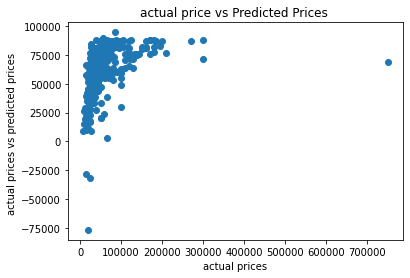

In [148]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual prices")
plt.ylabel("actual prices vs predicted prices ")
plt.title("actual price vs Predicted Prices ")
plt.show()

Get future Predictions 


let Select the a Random Sample from existing Data Set as new Value 


1.Extract a Random Sample row using sample function 
2.Seprate X and Y 
3.Predict 


In [149]:
def_new = df.sample(1);

In [150]:
def_new

,Brand,Model,Selling_Price,Year,Owner,KM_Driven
586,Honda,Honda CBR-250R,100000,2011,1,3500


In [151]:
def_new.shape

(1, 6)

In [152]:
X_new = def_new.drop(['Brand','Model','Selling_Price'], axis=1 )

In [153]:
y_pred_new =Ir.predict(X_new);

In [154]:
y_pred_new

array([59032.77947168])